Let's import the relevant packages inititally. 

In [17]:
import matplotlib.pyplot as plt
import matplotlib.axes as axes
%matplotlib inline
import numpy as np
import networkx as nx
from qiskit import BasicAer
from qiskit.tools.visualization import plot_histogram
from qiskit.aqua import Operator, run_algorithm
from qiskit.aqua.input import EnergyInput
from qiskit.aqua.translators.ising import max_cut, tsp
from qiskit.aqua.algorithms import VQE, ExactEigensolver
from qiskit.aqua.components.optimizers import SPSA
from qiskit.aqua.components.variational_forms import RY
from qiskit.aqua import QuantumInstance
import logging
from qiskit.aqua import set_qiskit_aqua_logging


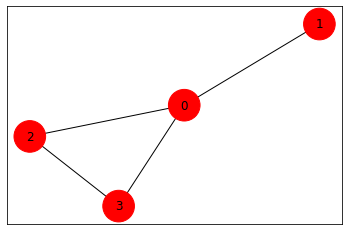

[[0. 1. 1. 1.]
 [1. 0. 0. 0.]
 [1. 0. 0. 1.]
 [1. 0. 1. 0.]]


In [18]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
#Create an instance of a graph
G=nx.Graph()
n=4
G.add_nodes_from(np.arange(0,n,1))

elist=[0,2,1.0],[0,1,1.0],[0,3,1.0],[2,3,1.0]
G.add_weighted_edges_from(elist)
colors=['r' for why in G.nodes()]
nx.draw_networkx(G, node_color=colors,node_size=1000)
plt.show()

# Here, we create the adjacency matrix
w=np.zeros([n,n])
for i in range(n):
    for j in range(n):
        temp = G.get_edge_data(i,j,default=0)
        if temp != 0:
            w[i,j] = temp['weight'] 
  
print(w)
    

In [20]:
from qiskit.aqua import Operator
from qiskit.quantum_info import Pauli

# Form your Qubit Hamiltonian for the vertex cover problem
penalty=2.0
def myHamiltonian(adj_matrix):
    total_nodes=adj_matrix.shape[0]
    offset=0
    pauli_list=[]
    for i in range(total_nodes):
        for j in range(i):
            if(adj_matrix[i,j]!=0):
                z=np.zeros(total_nodes, dtype=bool)
                x=np.zeros(total_nodes, dtype=bool)
                z[i]=True
                z[j]=True
                pauli_list.append([0.25*penalty,Pauli(z,x)])
                z=np.zeros(total_nodes, dtype=bool)
                z[i]=True
                pauli_list.append([0.25*penalty,Pauli(z,x)])
                z=np.zeros(total_nodes, dtype=bool)
                z[j]=True
                pauli_list.append([0.25*penalty,Pauli(z,x)])
                z=np.zeros(total_nodes, dtype=bool)
                pauli_list.append([0.25*penalty,Pauli(z,x)])
                
                
    # In the next for loop, we try to minimize the number of colored vertices since we are solving a minimal vertex cover problem.            
    for i in range(total_nodes):
        z=np.zeros(total_nodes, dtype=bool)
        x=np.zeros(total_nodes, dtype=bool)
        pauli_list.append([0.5,Pauli(z,x)]) 
        z=np.zeros(total_nodes, dtype=bool)
        z[i]=True
        pauli_list.append([-0.5,Pauli(z,x)])
    print(pauli_list)
    return Operator(paulis=pauli_list)


qubitOp=myHamiltonian(w)

algo_input = EnergyInput(qubitOp)

[[0.5, Pauli(z=[True, True, False, False], x=[False, False, False, False])], [0.5, Pauli(z=[False, True, False, False], x=[False, False, False, False])], [0.5, Pauli(z=[True, False, False, False], x=[False, False, False, False])], [0.5, Pauli(z=[False, False, False, False], x=[False, False, False, False])], [0.5, Pauli(z=[True, False, True, False], x=[False, False, False, False])], [0.5, Pauli(z=[False, False, True, False], x=[False, False, False, False])], [0.5, Pauli(z=[True, False, False, False], x=[False, False, False, False])], [0.5, Pauli(z=[False, False, False, False], x=[False, False, False, False])], [0.5, Pauli(z=[True, False, False, True], x=[False, False, False, False])], [0.5, Pauli(z=[False, False, False, True], x=[False, False, False, False])], [0.5, Pauli(z=[True, False, False, False], x=[False, False, False, False])], [0.5, Pauli(z=[False, False, False, False], x=[False, False, False, False])], [0.5, Pauli(z=[False, False, True, True], x=[False, False, False, False])],

C:\ProgramData\Anaconda3\lib\site-packages\qiskit\aqua\operator.py:62: DeprecationWarning: The `Operator` class is deprecated and will be removed after 0.6. Use the class for each representation instead, including `MatrixOperator`, `WeightedPauliOperator` and `TPBGroupedWeightedPauliOperator`
  DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\qiskit\aqua\operator.py:369: DeprecationWarning: The `Operator` class is deprecated and will be removed after 0.6. Use the class for each representation instead, including `MatrixOperator`, `WeightedPauliOperator` and `TPBGroupedWeightedPauliOperator`
  DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\qiskit\aqua\operator.py:267: DeprecationWarning: The `Operator` class is deprecated and will be removed after 0.6. Use the class for each representation instead, including `MatrixOperator`, `WeightedPauliOperator` and `TPBGroupedWeightedPauliOperator`
  DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\qiskit\

C:\ProgramData\Anaconda3\lib\site-packages\qiskit\aqua\operator.py:467: DeprecationWarning: The `Operator` class is deprecated and will be removed after 0.6. Use the class for each representation instead, including `MatrixOperator`, `WeightedPauliOperator` and `TPBGroupedWeightedPauliOperator`
  DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\qiskit\aqua\algorithms\adaptive\vqe\vqe.py:105: DeprecationWarning: operator_mode option is deprecated and it will be removed after 0.6. Now the operator has its own mode, no need extra info to tell the VQE.
  "Now the operator has its own mode, no need extra info to tell the VQE.", DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\qiskit\aqua\algorithms\adaptive\vqe\vqe.py:117: DeprecationWarning: operator should be type of BaseOperator, Operator type is deprecated and it will be removed after 0.6.
  "it will be removed after 0.6.", DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\qiskit\aqua\operators\op

energy: 2.035967053800591
time: 33.17231035232544
weighted-min-vertex-cover objective: 2.035967053800591
solution: [1. 0. 1. 0.]


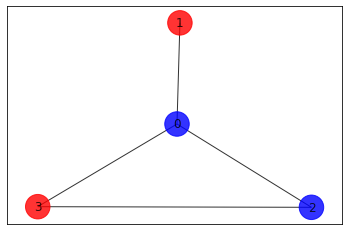

In [22]:
seed = 10598
#Choose a classical non-linear optimizer. We have chosen stochastic perturbation simultaneous approximation optimizer 
spsa = SPSA(max_trials=100)
#Choose a trial parametrized circuit
ry = RY(qubitOp.num_qubits,entanglement='full',entanglement_gate='cz')
#Create an object of class VQE
vqe = VQE(qubitOp, ry, spsa, 'matrix')
#Choose a backend
backend = BasicAer.get_backend('statevector_simulator')
quantum_instance = QuantumInstance(backend, shots=1024,seed_simulator=seed, seed_transpiler=seed)
result = vqe.run(quantum_instance)

#print(result['opt_params'])
# We use the sample_most_likely from the max_cut itself to choose for the eigenvector with the highest probability.
x = max_cut.sample_most_likely(result['eigvecs'][0])
print('energy:', result['energy'])
print('time:', result['eval_time'])
print('weighted-min-vertex-cover objective:', result['energy'])
print('solution:', x)
colors = ['r' if x[i] == 0 else 'b' for i in range(n)]
nx.draw_networkx(G, node_color=colors, node_size=600, alpha = .8)


Thus, we see that we have obtained the correct solution to the vertex cover problem using VQE. You can remove the warnings.